# Notebook Projet - HumanForYou

### Auteurs :
- BRASSEUR **Louis**
- BOUIC **Nathan**
- TANTON **Quentin**
- FRIEDRICH **Kevin**

#### Date : 14/03/2023

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Paths des différents fichiers
general_data_csv = "./dataset/general_data.csv"
employee_survey_data_csv = "./dataset/employee_survey_data.csv"
manager_survey_data_csv = "./dataset/manager_survey_data.csv"



# Chargement des données
data = pd.read_csv(general_data_csv, sep=',')
employee_survey_data = pd.read_csv(employee_survey_data_csv, sep=',')
manager_survey_data = pd.read_csv(manager_survey_data_csv, sep=',')

# Merge des données
data = pd.merge(data, employee_survey_data, on='EmployeeID')
data = pd.merge(data, manager_survey_data, on='EmployeeID')

data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,5.0,4,4,1,2,1.0,3.0,3.0,3,4
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,10.0,2,9,7,8,4.0,1.0,3.0,2,3


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# On sépare les données en train et test
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(data,data['Gender']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

data_train_set = strat_train_set.copy()
data_test_set = strat_test_set.copy()

# On a donc nos variables data_train_set et data_test_set pour le train et le test

In [305]:
#Ensuite on effectue un drop des collones qui nous sont jugés inutiles car toutes identiques :

data = data_train_set.drop(['EmployeeCount','Over18','StandardHours'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3528 entries, 1984 to 1093
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      3528 non-null   int64  
 1   Attrition                3528 non-null   object 
 2   BusinessTravel           3528 non-null   object 
 3   Department               3528 non-null   object 
 4   DistanceFromHome         3528 non-null   int64  
 5   Education                3528 non-null   int64  
 6   EducationField           3528 non-null   object 
 7   EmployeeID               3528 non-null   int64  
 8   Gender                   3528 non-null   object 
 9   JobLevel                 3528 non-null   int64  
 10  JobRole                  3528 non-null   object 
 11  MaritalStatus            3528 non-null   object 
 12  MonthlyIncome            3528 non-null   int64  
 13  NumCompaniesWorked       3515 non-null   float64
 14  PercentSalaryHike    

array([[<Axes: title={'center': '0'}>]], dtype=object)

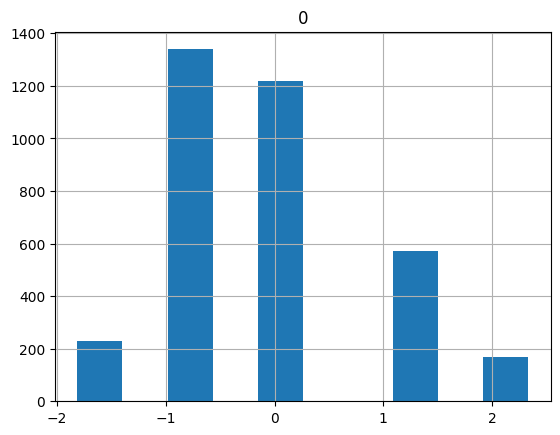

In [327]:
# On va ensuite transformer nos data afin qu'elles soient toute sous le même format

data = data_train_set.drop(['EmployeeCount','Over18','StandardHours'], axis=1)

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

missing_val_pipline = Pipeline([
        ('imputer', SimpleImputer(strategy="median"))
    ])

numeric_pipline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])


# ----- Age pipeline -----
data['Age'] = pd.cut(data['Age'], [17, 24, 34, 44, 54, 60], labels=['18-24', '25-34', '35-44', '45-54', '55-60'])

age_pipeline = Pipeline([
        ('ordinal', OrdinalEncoder()),
        ('std_scaler', StandardScaler()),
    ])

# age_pipelinetest = age_pipeline.fit_transform(data[['Age']])
# age_pipelinetest

# ----- Attrition pipeline -----
attrition_pipeline = Pipeline([
        ('ordinal', OrdinalEncoder()),
    ])

attrition_pipelinetest = attrition_pipeline.fit_transform(data[['Age']])
pd.DataFrame(attrition_pipelinetest).hist()

# ----- BusinessTravel pipeline -----




# pd.DataFrame(Age,columns=['Age']).hist()

# num_pipeline = Pipeline([
#         ('imputer', SimpleImputer(strategy="median")),
#         ('std_scaler', StandardScaler()),
#     ])

# num_values = data.select_dtypes(include=[np.number]) 
# num_attribs = list(num_values)
# ordinal_atribs = list(['Attrition','BusinessTravel','MaritalStatus'])
# nominal_atribs = list(['Department','EducationField','JobRole'])

# full_pipeline = ColumnTransformer([
#         ("num", num_pipeline, num_attribs),
#         ("ordinal", OrdinalEncoder(), ordinal_atribs),
#         ("nominal", OneHotEncoder(), nominal_atribs),
#     ])

# Découpage des données sur certaines collones : 

# data['Age'] = pd.cut(data['Age'], [0,25,35,45,60], labels=['18-25', '26-35','36-45','46-60'])
# pd.cut()
# data_prepared = full_pipeline.fit_transform(data)
# data_prepared.shape

In [280]:
full_pipeline_list_cat = []


for nominal_cat in full_pipeline.named_transformers_["nominal"].categories_:
    full_pipeline_list_cat.append(nominal_cat)

full_pipeline_list_cat.append(['Attrition','BusinessTravel','MaritalStatus'])
full_pipeline_list_cat = np.concatenate(full_pipeline_list_cat)

full_pipeline_list_cat

array(['Human Resources', 'Research & Development', 'Sales',
       'Human Resources', 'Life Sciences', 'Marketing', 'Medical',
       'Other', 'Technical Degree', 'Healthcare Representative',
       'Human Resources', 'Laboratory Technician', 'Manager',
       'Manufacturing Director', 'Research Director',
       'Research Scientist', 'Sales Executive', 'Sales Representative',
       'Attrition', 'BusinessTravel', 'MaritalStatus'], dtype=object)

In [281]:
data_post_prepare = pd.DataFrame(data_prepared, columns=num_attribs + list(full_pipeline_list_cat))

In [296]:
data_post_prepare['Attrition'].value_counts()


0.0    2840
1.0     688
Name: Attrition, dtype: int64